In [4]:
%pip install scikit-learn

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   --- ------------------------------------ 1.6/15.8 MB 32.9 MB/s eta 0:00:01
   ------- -------------------------------- 2.9/15.8 MB 31.2 MB/s eta 0:00:01
   ------------ --------------------------- 4.8/15.8 MB 37.9 MB/s eta 0:00:01
   ---------------- ----------------------- 6.7/15.8 MB 35.8 MB/s eta 0:00:01
   --------------------- ------------------ 8.6/15.8 MB 36.9 MB/s eta 0:00:01
   -------------------------- ------------- 10.6/15.8 MB 38.5 MB/s eta 0:00:01
   ------------------------------- -------- 12.6/15.8 MB 38.5 MB/s eta 0:00:01
   ------------------------------------ --- 14.6/15.8 MB 40.9 MB/s eta 0:00:01
   ---------------------------------------  15.8/15.8 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------- 15.8/15.8 MB 36.4 MB/s eta 0

  You can safely remove it manually.


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# Read dataset file

DATA_DIRECTORY = "data"
INPUT_FILE = "OSA_DB_UPM.xlsx"

df_OSA = pd.read_excel(os.path.join(DATA_DIRECTORY, INPUT_FILE))

In [23]:
df_OSA.head()

,Patient,Gender,Smoker,AHI,BMI,Age,Cervical
0,P0002,hombre,si,29.6,39.305060,56,48.0
1,P0004,hombre,no,19.7,27.636054,39,42.0
2,P0005,hombre,no,9.0,26.729927,32,40.0
3,P0006,hombre,no,2.0,30.193906,32,42.0
4,P0007,hombre,no,34.0,30.110991,39,42.0


In [4]:
# Change categorical features

df_OSA["Gender"] = df_OSA["Gender"].astype('category')
df_OSA["Smoker"] = df_OSA["Smoker"].astype('category')

In [ ]:
### EDA for regression ###

array([[<Axes: title={'center': 'AHI'}>, <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Cervical'}>]], dtype=object)

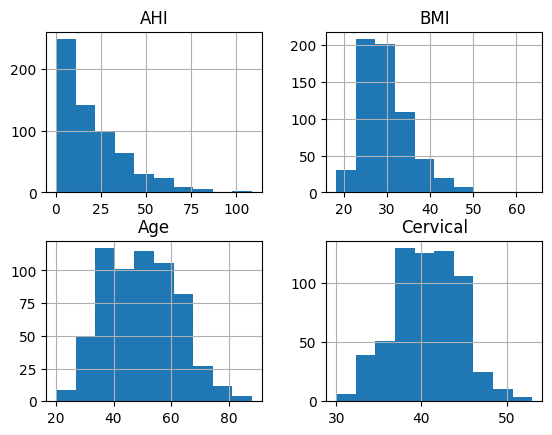

In [14]:
# Print histograms of numeric data

df_OSA.hist()

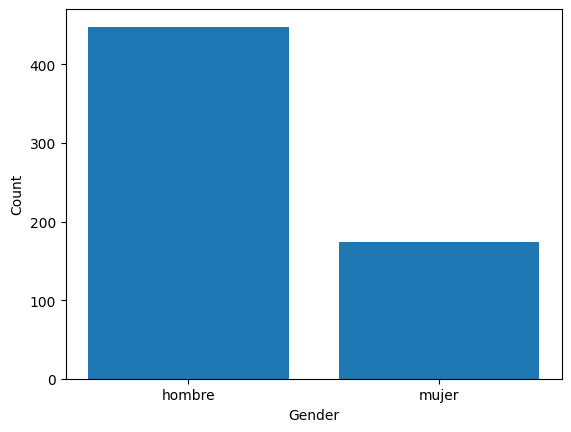

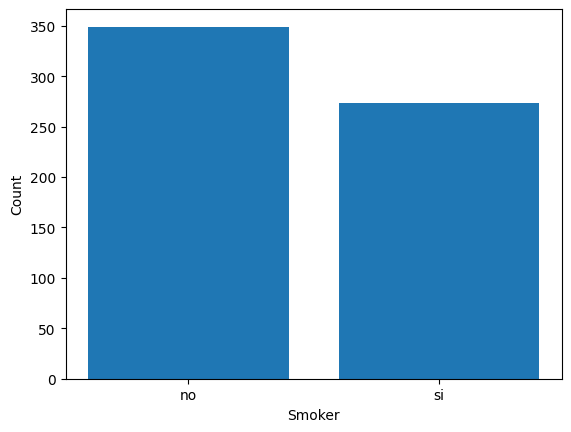

In [8]:
# Print barplot of categorical data
gender_counts = df_OSA['Gender'].value_counts()

# Create a bar plot
plt.bar(gender_counts.index, gender_counts)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

smoker_counts = df_OSA['Smoker'].value_counts()

# Create a bar plot
plt.bar(smoker_counts.index, smoker_counts)

# Add labels and title
plt.xlabel('Smoker')
plt.ylabel('Count')

plt.show()

In [9]:
cor_matrix = df_OSA.drop(['Patient','Gender','Smoker'],axis=1).corr()
cor_matrix.style.background_gradient()

,AHI,BMI,Age,Cervical
AHI,1.000000,0.372914,0.161802,0.418847
BMI,0.372914,1.000000,0.037292,0.534190
Age,0.161802,0.037292,1.000000,0.080527
Cervical,0.418847,0.534190,0.080527,1.000000


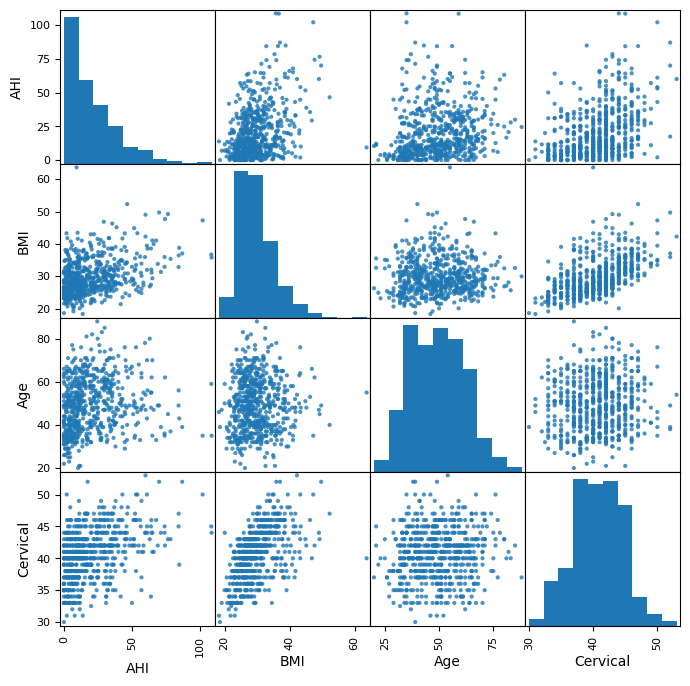

In [75]:
pd.plotting.scatter_matrix(df_OSA, alpha=0.8, figsize=(8, 8), diagonal='hist', grid=True)

plt.savefig("scattering.png")

C:\Users\pablo\AppData\Local\Temp\ipykernel_9140\2842308152.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df_OSA[df_OSA["AHI"]>30].groupby("Gender")["AHI"].count()


Text(0, 0.5, 'Number of severe OSA cases (AHI>30)')

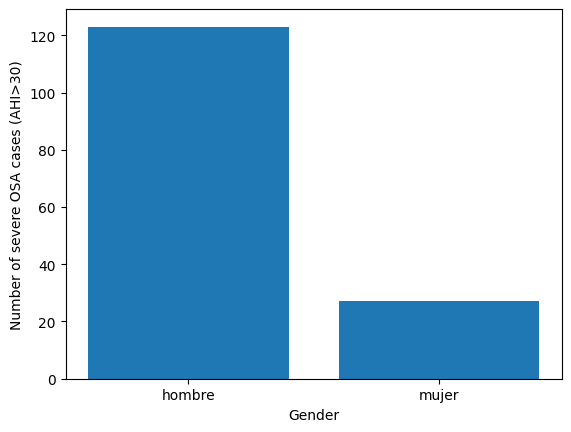

In [15]:
# Count severe cases for males and females separately

res = df_OSA[df_OSA["AHI"]>30].groupby("Gender")["AHI"].count()
plt.bar(res.index, res)

plt.xlabel("Gender")
plt.ylabel("Number of severe OSA cases (AHI>30)")

C:\Users\pablo\AppData\Local\Temp\ipykernel_9140\1869842243.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df_OSA[df_OSA["AHI"]>30].groupby("Smoker")["AHI"].count()


<BarContainer object of 2 artists>

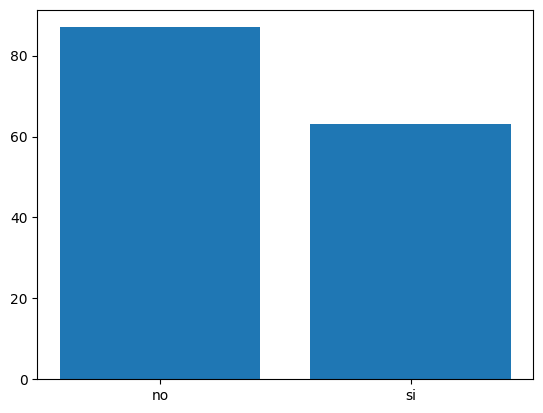

In [13]:
# Count severe cases for smokers and non-smokers separately
res = df_OSA[df_OSA["AHI"]>30].groupby("Smoker")["AHI"].count()
plt.bar(res.index, res)

In [ ]:
### EDA for classification ###

In [16]:
# Separate dataframes for severe and healthy cases
df_severe = df_OSA[df_OSA["AHI"]>30]
df_healthy = df_OSA[df_OSA["AHI"]<=30]

<Axes: >

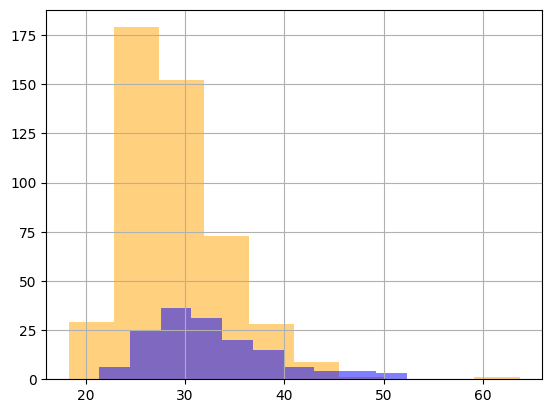

In [51]:
# Plot some histograms
df_healthy["Cervical"].hist(alpha=0.5, color='orange')
df_severe["Cervical"].hist(alpha=0.5, color='blue')

<Axes: >

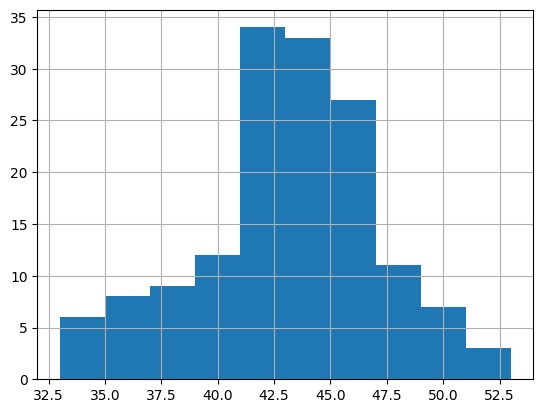

In [23]:
df_severe["Cervical"].hist()

<Axes: >

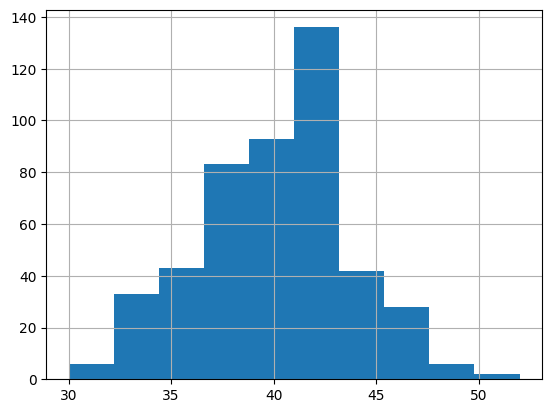

In [22]:
df_healthy["Cervical"].hist()

array([[<Axes: title={'center': 'AHI'}>, <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Cervical'}>]], dtype=object)

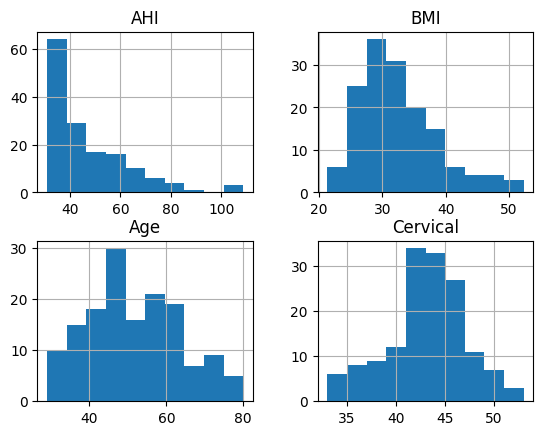

In [24]:
df_severe.hist()

array([[<Axes: title={'center': 'AHI'}>, <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Cervical'}>]], dtype=object)

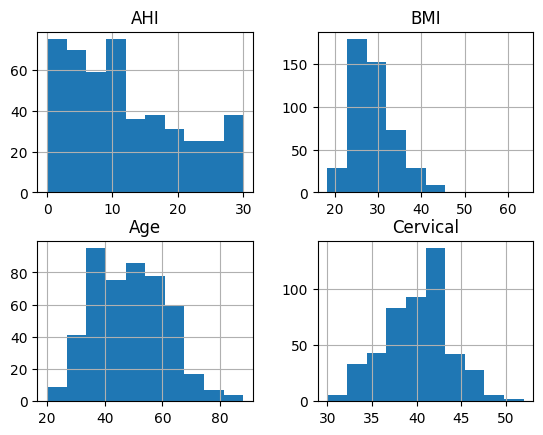

In [25]:
df_healthy.hist()

array([[<Axes: xlabel='AHI', ylabel='AHI'>,
        <Axes: xlabel='BMI', ylabel='AHI'>,
        <Axes: xlabel='Age', ylabel='AHI'>,
        <Axes: xlabel='Cervical', ylabel='AHI'>],
       [<Axes: xlabel='AHI', ylabel='BMI'>,
        <Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='Age', ylabel='BMI'>,
        <Axes: xlabel='Cervical', ylabel='BMI'>],
       [<Axes: xlabel='AHI', ylabel='Age'>,
        <Axes: xlabel='BMI', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Cervical', ylabel='Age'>],
       [<Axes: xlabel='AHI', ylabel='Cervical'>,
        <Axes: xlabel='BMI', ylabel='Cervical'>,
        <Axes: xlabel='Age', ylabel='Cervical'>,
        <Axes: xlabel='Cervical', ylabel='Cervical'>]], dtype=object)

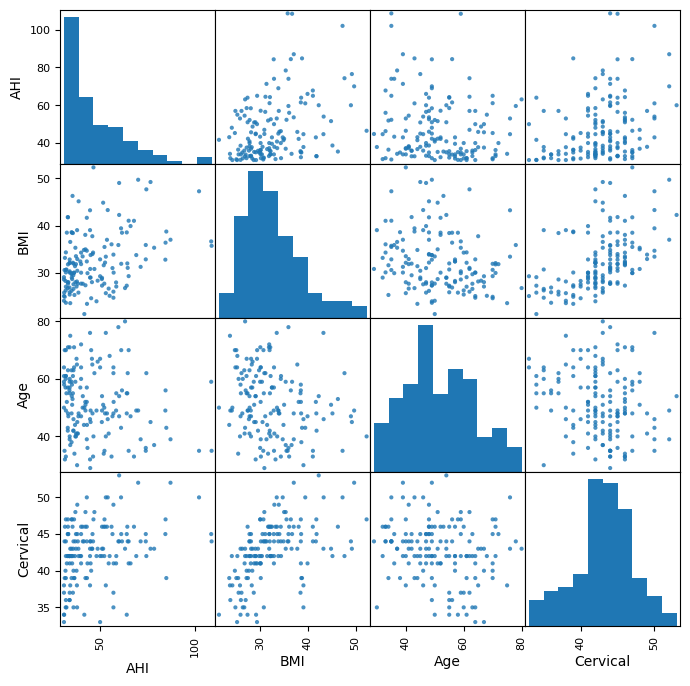

In [26]:
pd.plotting.scatter_matrix(df_severe, alpha=0.8, figsize=(8, 8), diagonal='hist', grid=True)

array([[<Axes: xlabel='AHI', ylabel='AHI'>,
        <Axes: xlabel='BMI', ylabel='AHI'>,
        <Axes: xlabel='Age', ylabel='AHI'>,
        <Axes: xlabel='Cervical', ylabel='AHI'>,
        <Axes: xlabel='AHI', ylabel='AHI'>,
        <Axes: xlabel='BMI', ylabel='AHI'>,
        <Axes: xlabel='Age', ylabel='AHI'>,
        <Axes: xlabel='Cervical', ylabel='AHI'>],
       [<Axes: xlabel='AHI', ylabel='BMI'>,
        <Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='Age', ylabel='BMI'>,
        <Axes: xlabel='Cervical', ylabel='BMI'>,
        <Axes: xlabel='AHI', ylabel='BMI'>,
        <Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='Age', ylabel='BMI'>,
        <Axes: xlabel='Cervical', ylabel='BMI'>],
       [<Axes: xlabel='AHI', ylabel='Age'>,
        <Axes: xlabel='BMI', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Cervical', ylabel='Age'>,
        <Axes: xlabel='AHI', ylabel='Age'>,
        <Axes: xlabel='BMI', ylabel='Age'>,
     

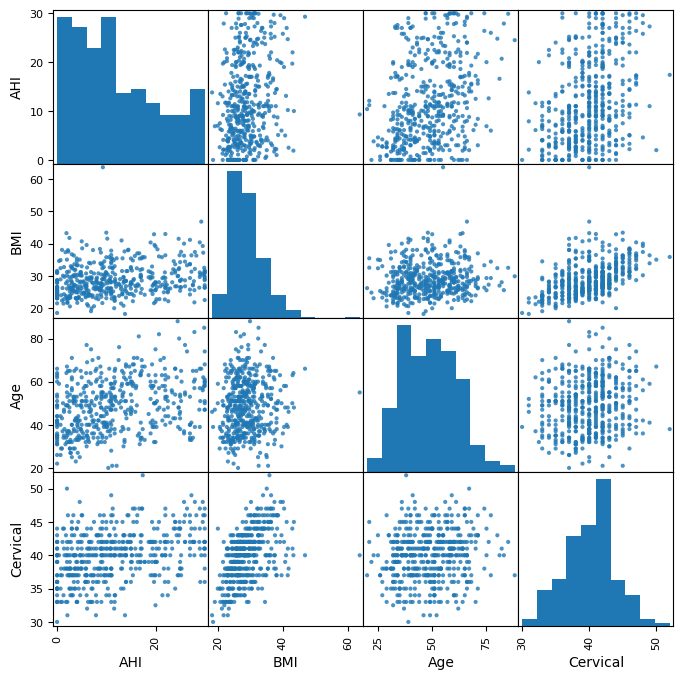

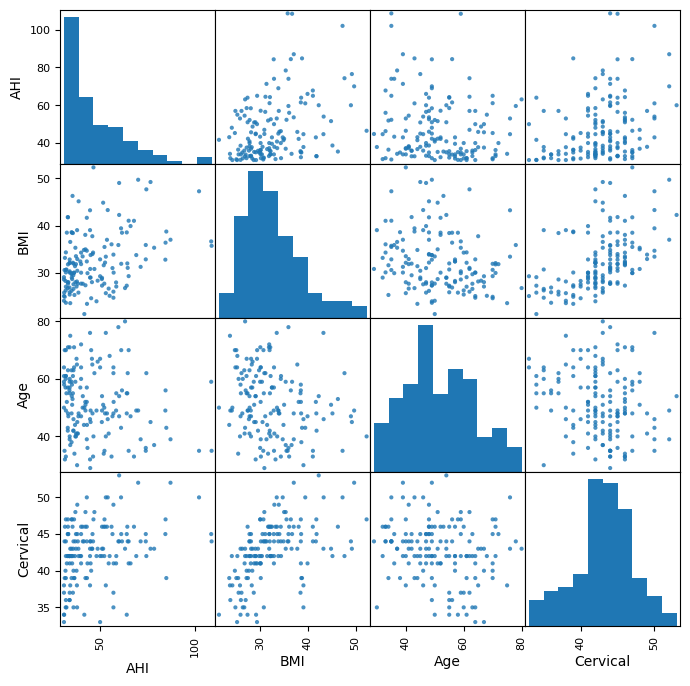

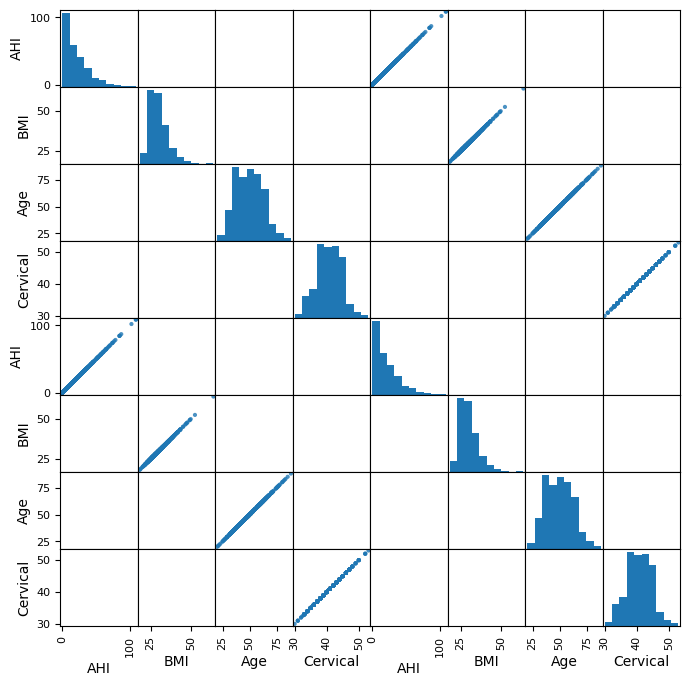

In [58]:
pd.plotting.scatter_matrix(df_healthy, alpha=0.8, figsize=(8, 8), diagonal='hist', grid=True)
pd.plotting.scatter_matrix(df_severe, alpha=0.8, figsize=(8, 8), diagonal='hist', grid=True)
pd.plotting.scatter_matrix(pd.concat([df_healthy,df_severe],axis=1), alpha=0.8, figsize=(8, 8), diagonal='hist', grid=True)

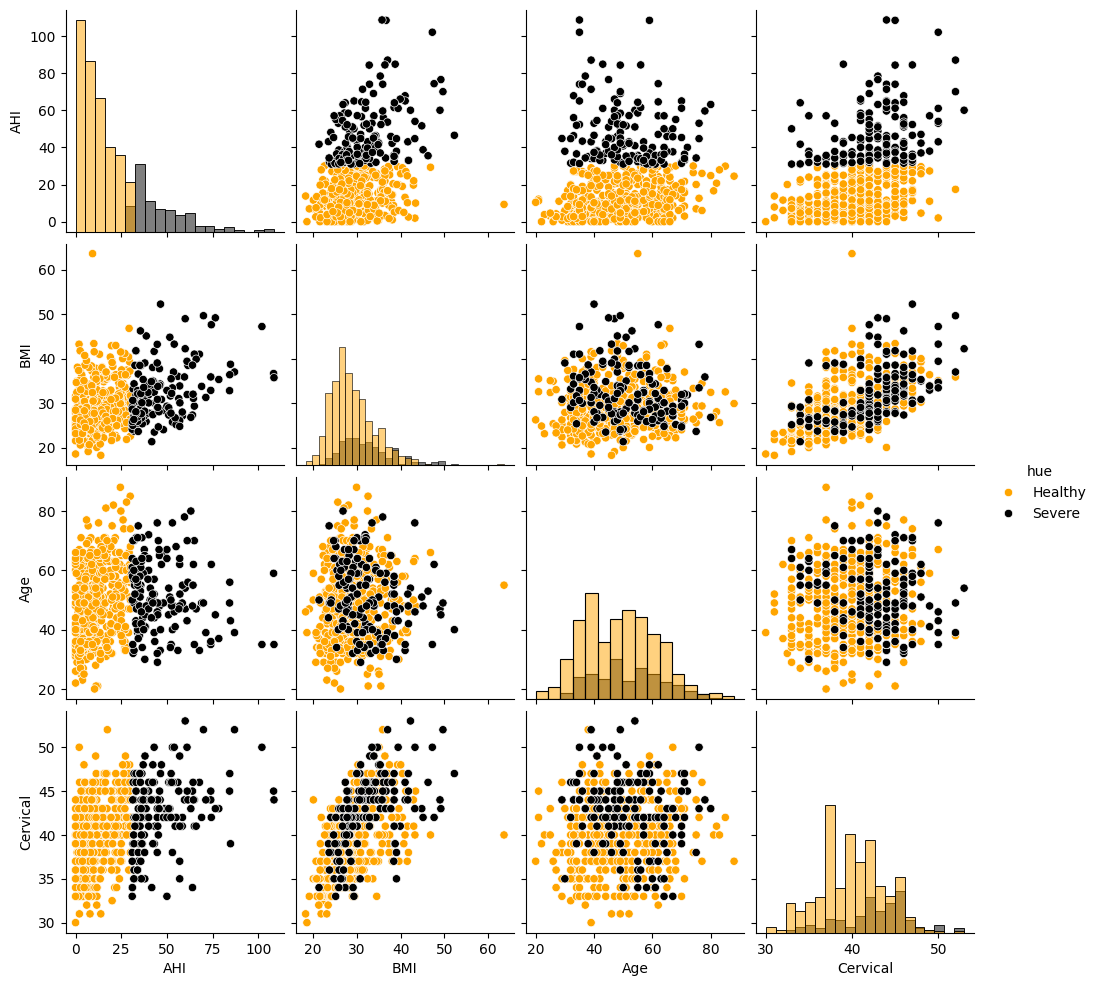

In [62]:
import seaborn as sns
sns.pairplot(pd.concat([df_healthy.assign(hue='Healthy'), 
                        df_severe.assign(hue='Severe')]), 
             hue='hue', 
             diag_kind='hist', 
             palette=['orange', 'k'])
plt.savefig("seaborn_plot.png")

Text(0, 0.5, 'AHI')

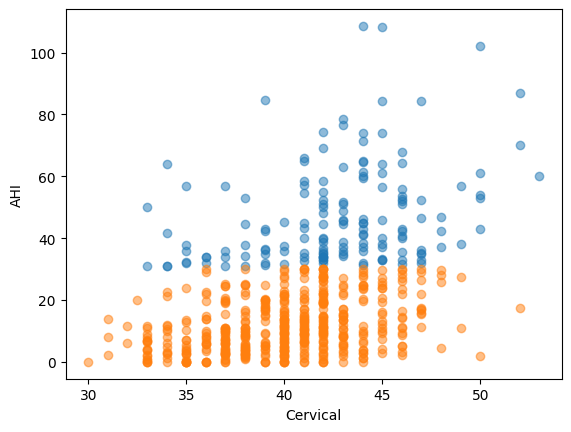

In [34]:
plt.scatter(df_severe["Cervical"], df_severe["AHI"], alpha=0.5)
plt.scatter(df_healthy["Cervical"], df_healthy["AHI"], alpha=0.5)

plt.xlabel("Cervical")
plt.ylabel("AHI")

Text(0, 0.5, 'AHI')

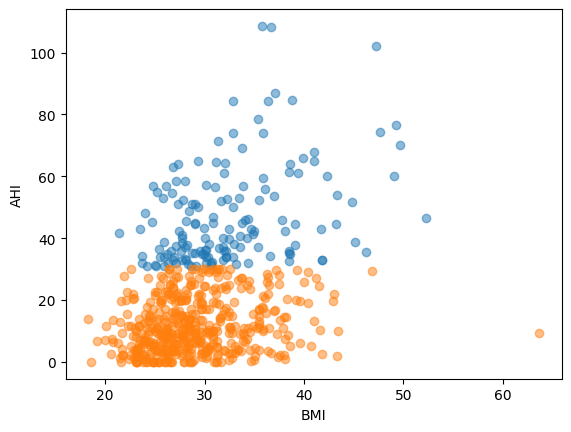

In [35]:
plt.scatter(df_severe["BMI"], df_severe["AHI"], alpha=0.5)
plt.scatter(df_healthy["BMI"], df_healthy["AHI"], alpha=0.5)

plt.xlabel("BMI")
plt.ylabel("AHI")

Text(0, 0.5, 'AHI')

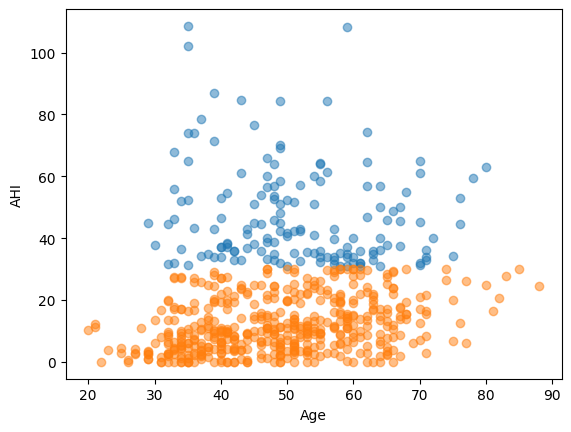

In [37]:
plt.scatter(df_severe["Age"], df_severe["AHI"], alpha=0.5)
plt.scatter(df_healthy["Age"], df_healthy["AHI"], alpha=0.5)

plt.xlabel("Age")
plt.ylabel("AHI")

Text(0, 0.5, 'AHI')

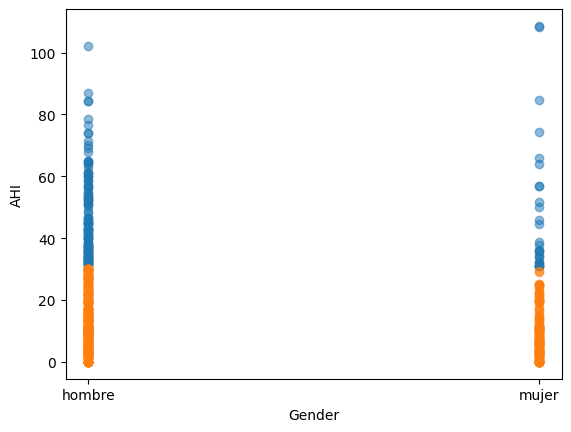

In [38]:
plt.scatter(df_severe["Gender"], df_severe["AHI"], alpha=0.5)
plt.scatter(df_healthy["Gender"], df_healthy["AHI"], alpha=0.5)

plt.xlabel("Gender")
plt.ylabel("AHI")

Text(0, 0.5, 'AHI')

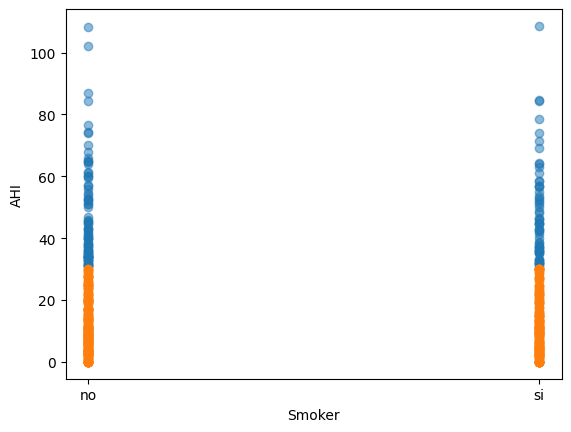

In [39]:
plt.scatter(df_severe["Smoker"], df_severe["AHI"], alpha=0.5)
plt.scatter(df_healthy["Smoker"], df_healthy["AHI"], alpha=0.5)

plt.xlabel("Smoker")
plt.ylabel("AHI")

Text(0, 0.5, 'BMI')

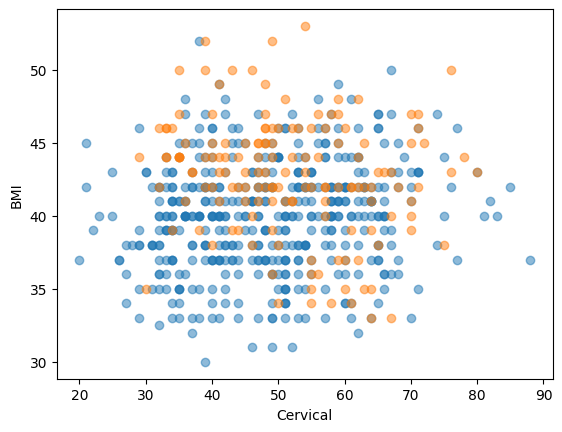

In [55]:
plt.scatter(df_healthy["Age"], df_healthy["Cervical"], alpha=0.5)
plt.scatter(df_severe["Age"], df_severe["Cervical"], alpha=0.5)

plt.xlabel("Cervical")
plt.ylabel("BMI")

In [73]:
df_healthy[df_healthy["Gender"]=='hombre']

0       True
1       True
2       True
3       True
6       True
       ...  
613    False
615    False
616     True
618     True
620    False
Name: Gender, Length: 472, dtype: bool

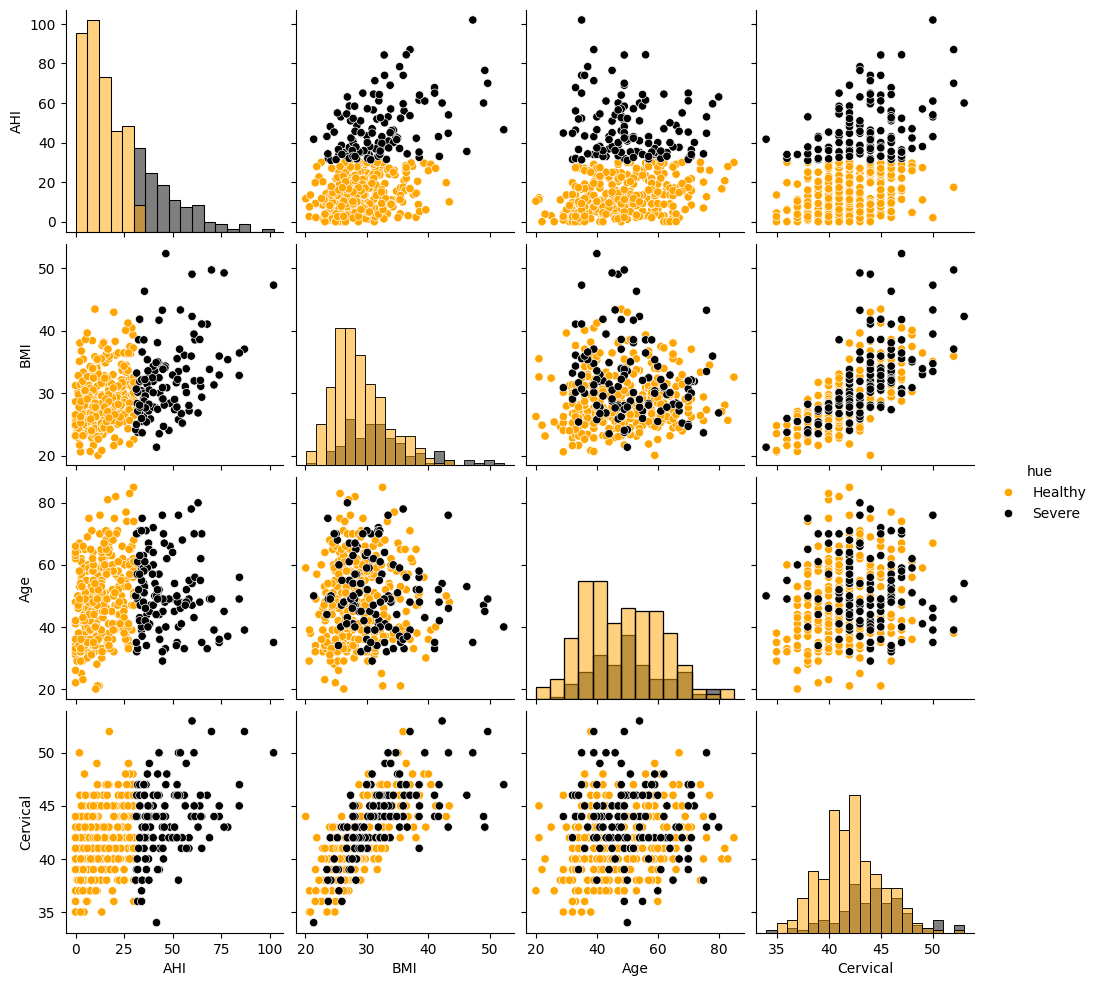

In [74]:
import seaborn as sns
male_df_healthy = df_healthy[df_healthy["Gender"]=='hombre']
male_df_severe = df_severe[df_severe["Gender"]=='hombre']
sns.pairplot(pd.concat([male_df_healthy.assign(hue='Healthy'), 
                        male_df_severe.assign(hue='Severe')]), 
             hue='hue', 
             diag_kind='hist', 
             palette=['orange', 'k'])
plt.savefig("seaborn_plot.png")

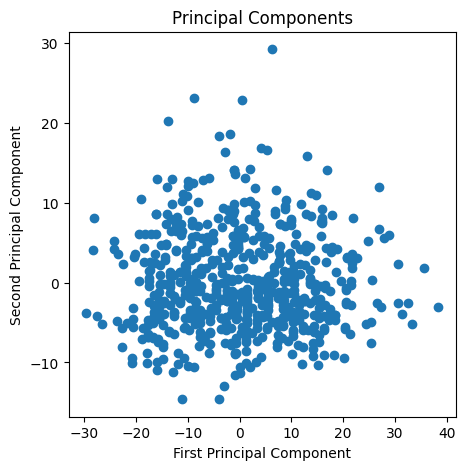

In [3]:
# Perform PCA

df_PCA = df_OSA.copy()

df_PCA = df_PCA.drop(['Patient','Gender','Smoker'],axis=1)
df_PCA = df_PCA.drop('AHI',axis=1)

# Instantiate PCA with the number of components you want
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(df_PCA)

# Transform the data to its principal components
transformed_data = pca.transform(df_PCA)

# Plot the original and transformed data
plt.figure(figsize=(5, 5))

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Principal Components')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

plt.show()

In [4]:
# Separate transformed data in severe and healthy
severe_PC = transformed_data[df_OSA["AHI"] > 30]
healthy_PC = transformed_data[df_OSA["AHI"] <= 30]

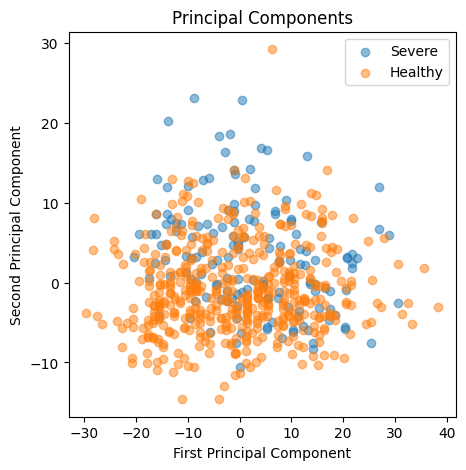

In [6]:
# Plot transformed data for severe and healthy cases
plt.figure(figsize=(5, 5))

plt.scatter(severe_PC[:, 0], severe_PC[:, 1], alpha=0.5, label="Severe")
plt.scatter(healthy_PC[:, 0], healthy_PC[:, 1], alpha=0.5, label="Healthy")
plt.title('Principal Components')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()

plt.show()

In [49]:
BMI_PC = pca.components_[:,0]
Age_PC = pca.components_[:,1]
Cervical_PC = pca.components_[:,2]

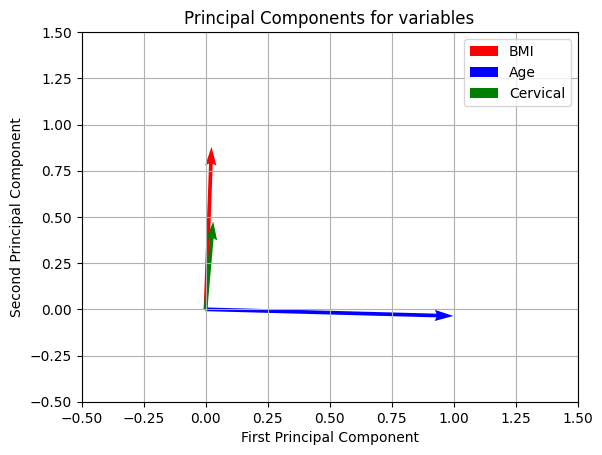

In [55]:
# Plot principal components vectors

origin = [0,0]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot vectors using quiver
ax.quiver(*origin, *BMI_PC, scale=1, scale_units='xy', angles='xy', color='r', label='BMI')
ax.quiver(*origin, *Age_PC, scale=1, scale_units='xy', angles='xy', color='b', label='Age')
ax.quiver(*origin, *Cervical_PC, scale=1, scale_units='xy', angles='xy', color='g', label='Cervical')

# Set axis limits
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

# Set labels and title
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Principal Components for variables')

# Add a legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()

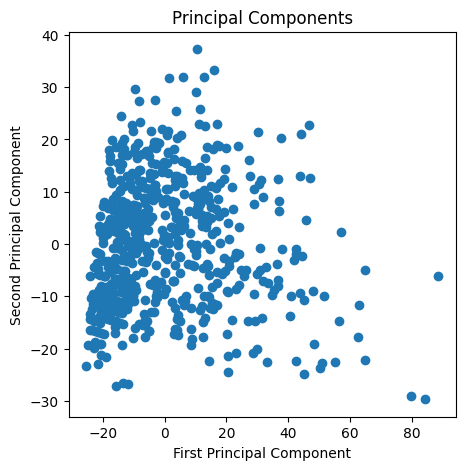

In [7]:
# Perform PCA

df_PCA = df_OSA.copy()

df_PCA = df_PCA.drop(['Patient','Gender','Smoker'],axis=1)

# Instantiate PCA with the number of components you want
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(df_PCA)

# Transform the data to its principal components
transformed_data = pca.transform(df_PCA)

# Plot the original and transformed data
plt.figure(figsize=(5, 5))

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Principal Components')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

plt.show()

In [8]:
# Separate transformed data in severe and healthy
severe_PC = transformed_data[df_OSA["AHI"] > 30]
healthy_PC = transformed_data[df_OSA["AHI"] <= 30]

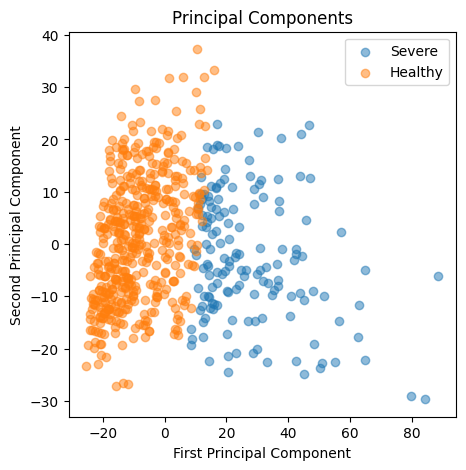

In [9]:
# Plot transformed data for severe and healthy cases
plt.figure(figsize=(5, 5))

plt.scatter(severe_PC[:, 0], severe_PC[:, 1], alpha=0.5, label="Severe")
plt.scatter(healthy_PC[:, 0], healthy_PC[:, 1], alpha=0.5, label="Healthy")
plt.title('Principal Components')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()

plt.show()

In [62]:
AHI_PC = pca.components_[:,0]
BMI_PC = pca.components_[:,1]
Age_PC = pca.components_[:,2]
Cervical_PC = pca.components_[:,3]

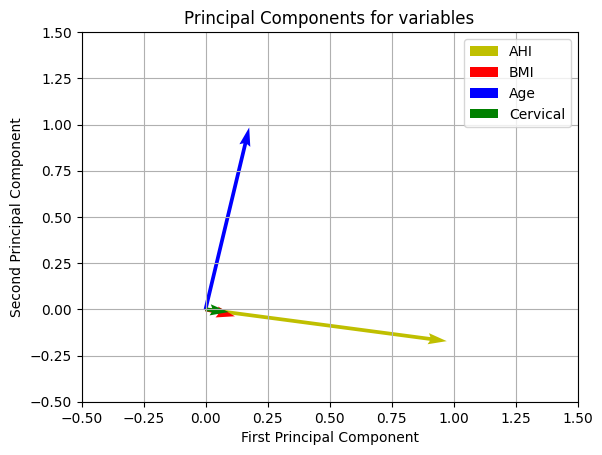

In [63]:
# Plot principal components vectors

origin = [0,0]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot vectors using quiver
ax.quiver(*origin, *AHI_PC, scale=1, scale_units='xy', angles='xy', color='y', label='AHI')
ax.quiver(*origin, *BMI_PC, scale=1, scale_units='xy', angles='xy', color='r', label='BMI')
ax.quiver(*origin, *Age_PC, scale=1, scale_units='xy', angles='xy', color='b', label='Age')
ax.quiver(*origin, *Cervical_PC, scale=1, scale_units='xy', angles='xy', color='g', label='Cervical')

# Set axis limits
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

# Set labels and title
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('Principal Components for variables')

# Add a legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()